# **Prediction of Nephropathy in Diabetic Patients**
---
Amira Ghina Nurfansepta (215150201111026)

## **Data Understanding**

### **Import Library**

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import Lars
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import RANSACRegressor

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingRegressor

from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.kernel_approximation import RBFSampler

import time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Penelitian/data_pasien_diabetes.csv')
df.head()

,Name,Patient ID,Age,Creatinine,Semi-quantitative UACR,Urinary Creatinine,Quantitative UACR,Urinary Albumin
0,Adinda Maya Vidianti,11539264,20,0.91,NaN,68.3,194.20,103.27
1,Geraldi Satria,11561505,4,NaN,NaN,21.8,251.00,54.80
2,Yuni Setyowati,11561162,41,NaN,>=300,23.7,32.62,77.20
3,Ulfa,11224476,26,3.17,>=300,56.3,1110.90,62.49
4,Dalifa Fatimah,11323947,28,140.40,NaN,140.4,240.00,336.90


### **Number of Rows and Columns**

In [ ]:
print("Number of rows =", df.shape[0])
print("Number of columns =", df.shape[1])

Number of rows = 500
Number of columns = 8


### **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    500 non-null    object 
 1   Patient ID              500 non-null    int64  
 2   Age                     500 non-null    int64  
 3   Creatinine              340 non-null    float64
 4   Semi-quantitative UACR  318 non-null    object 
 5   Urinary Creatinine      500 non-null    float64
 6   Quantitative UACR       495 non-null    float64
 7   Urinary Albumin         499 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


### **Descriptive Statistics**

**Numerical Column**

In [ ]:
df.describe()

,Patient ID,Age,Creatinine,Urinary Creatinine,Quantitative UACR,Urinary Albumin
count,5.000000e+02,500.000000,340.000000,500.000000,495.000000,499.000000
mean,1.083715e+07,32.046000,1.413853,130.517820,1326.601111,865.203848
std,2.499121e+06,13.084276,7.638400,345.006133,6914.953062,2130.941434
min,2.081300e+05,3.000000,0.200000,0.300000,1.900000,0.550000
25%,1.135895e+07,22.000000,0.590000,42.500000,21.450000,15.450000
50%,1.149944e+07,29.000000,0.715000,79.100000,132.100000,87.700000
75%,1.154286e+07,39.000000,0.962500,139.275000,705.300000,503.200000
max,1.158394e+07,82.000000,140.400000,5022.200000,121845.570000,14267.400000


**Categorical Column**

In [ ]:
df.describe(include='object')

,Name,Semi-quantitative UACR
count,500,318
unique,363,14
top,Adinda Maya Vidianti,<30
freq,6,77


### **Duplicated Data**

In [ ]:
print("Number of duplicate data in the dataset:", df.duplicated().sum())

display(df[df.duplicated()])
df[df['Name'] == "Adinda Maya Vidianti"]

Number of duplicate data in the dataset: 1


,Name,Patient ID,Age,Creatinine,Semi-quantitative UACR,Urinary Creatinine,Quantitative UACR,Urinary Albumin
403,Adinda Maya Vidianti,11539264,20,0.82,NaN,76.5,132.1,101.0


,Name,Patient ID,Age,Creatinine,Semi-quantitative UACR,Urinary Creatinine,Quantitative UACR,Urinary Albumin
0,Adinda Maya Vidianti,11539264,20,0.91,NaN,68.3,194.2,103.27
92,Adinda Maya Vidianti,11539264,20,0.95,80,113.8,117.4,133.60
193,Adinda Maya Vidianti,11539264,21,0.73,150,115.7,121.3,140.40
336,Adinda Maya Vidianti,11539264,20,0.82,NaN,76.5,132.1,101.00
403,Adinda Maya Vidianti,11539264,20,0.82,NaN,76.5,132.1,101.00
469,Adinda Maya Vidianti,11539264,20,0.62,NaN,24.2,174.7,42.20


There is a duplication of data on Adinda Maya Vidianti, so it must be deleted.

### **Missing Value**

In [ ]:
df.isna().sum()

Name                        0
Patient ID                  0
Age                         0
Creatinine                160
Semi-quantitative UACR    182
Urinary Creatinine          0
Quantitative UACR           5
Urinary Albumin             1
dtype: int64

There are many missing values in columns Creatinine and Semi-quantitative UACR, so imputation is necessary. In addition, there are few missing values in columns Quantitative UACR and Urinary Albumin, so they need to be dropped.

## **Data Preprocessing**

### **Remove Duplicated Data**

In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

### **Drop Missing Value**

In [ ]:
df = df.dropna(subset=['Urinary Albumin', 'Quantitative UACR'])
df.isna().sum()

Name                        0
Patient ID                  0
Age                         0
Creatinine                156
Semi-quantitative UACR    178
Urinary Creatinine          0
Quantitative UACR           0
Urinary Albumin             0
dtype: int64

### **Input Missing Value**

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

knn_imputer = KNNImputer(n_neighbors=2)
simple_imputer = SimpleImputer(strategy='most_frequent')

df_input = df.copy()
df_input['Creatinine'] = knn_imputer.fit_transform(df_input[['Creatinine']])
df_input['Semi-quantitative UACR'] = simple_imputer.fit_transform(df_input[['Semi-quantitative UACR']])
df_input.head()

,Name,Patient ID,Age,Creatinine,Semi-quantitative UACR,Urinary Creatinine,Quantitative UACR,Urinary Albumin
0,Adinda Maya Vidianti,11539264,20,0.910000,<30,68.3,194.20,103.27
1,Geraldi Satria,11561505,4,1.406627,<30,21.8,251.00,54.80
2,Yuni Setyowati,11561162,41,1.406627,>=300,23.7,32.62,77.20
3,Ulfa,11224476,26,3.170000,>=300,56.3,1110.90,62.49
4,Dalifa Fatimah,11323947,28,140.400000,<30,140.4,240.00,336.90


In [ ]:
df_input.isna().sum()

Name                      0
Patient ID                0
Age                       0
Creatinine                0
Semi-quantitative UACR    0
Urinary Creatinine        0
Quantitative UACR         0
Urinary Albumin           0
dtype: int64

Missing values have been filled in df_input.

## **Exploratory Data Analysis**

### **Analysing The Features**

**Name**

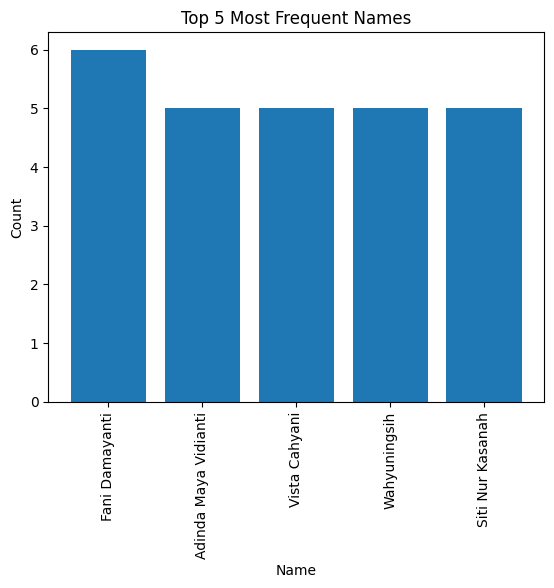

In [ ]:
df_name = df['Name'].value_counts(ascending=False).reset_index()
df_name.columns = ['Name', 'Count']
df_name_head = df_name.head()

plt.bar(df_name_head['Name'], df_name_head['Count'])
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 5 Most Frequent Names')
plt.show()

Patient with the most names in the dataset is Fani Damayanti, which is 6 times.

**Patients ID**

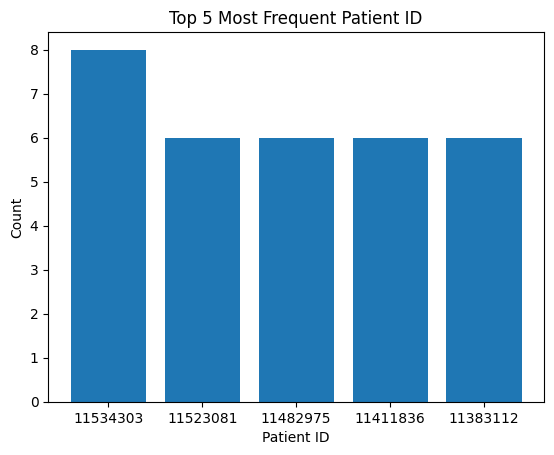

In [ ]:
df_id = df['Patient ID'].value_counts(ascending=False).reset_index()
df_id.columns = ['Patient ID', 'Count']
df_id['Patient ID'] = df_id['Patient ID'].astype(str)
df_id_head = df_id.head()

plt.bar(df_id_head['Patient ID'], df_id_head['Count'])
plt.xlabel('Patient ID')
plt.ylabel('Count')
plt.title('Top 5 Most Frequent Patient ID')
plt.show()

In [ ]:
display(df[df['Patient ID'] == 11534303])
df[df['Patient ID'] == 11523081]

,Name,Patient ID,Age,Creatinine,Semi-quantitative UACR,Urinary Creatinine,Quantitative UACR,Urinary Albumin
71,Meytabila,11534303,20,1.61,NaN,58.7,1536.40,902.0
129,Meytabilla,11534303,20,1.73,80,53.1,98.70,52.4
164,Meytabilla,11534303,21,1.59,80,178.7,90.00,160.8
187,Meytabilla,11534303,21,1.25,NaN,28.1,245.10,68.8
205,Meytabilla Mauludy,11534303,21,1.53,80,56.7,129.10,73.2
227,Meytabilla,11534303,21,1.30,80,120.0,89.17,107.0
236,Meytabilla Mauludy,11534303,20,2.05,>300,177.2,697.50,1235.6
321,Meytabilla Mauludy,11534303,20,1.31,>300,201.0,601.49,1209.0


,Name,Patient ID,Age,Creatinine,Semi-quantitative UACR,Urinary Creatinine,Quantitative UACR,Urinary Albumin
37,Wahyunignsih,11523081,28,0.38,>=300,149.7,267.2,399.8
77,Wahyunignsih,11523081,28,0.41,>= 300,144.0,509.5,733.7
151,Wahyuningsih,11523081,28,0.40,>=300,105.5,237.3,250.2
302,Wahyuningsih,11523081,28,0.31,>300,162.4,42.7,69.4
349,Wahyuningsih,11523081,28,0.36,>=300,30.2,753.2,227.7
378,Wahyuningsih,11523081,28,0.45,NaN,152.4,112.1,170.8


Patient with the most IDs in the dataset is not the same as the most names. This can occur due to incomplete or typo name writing.

**Age**

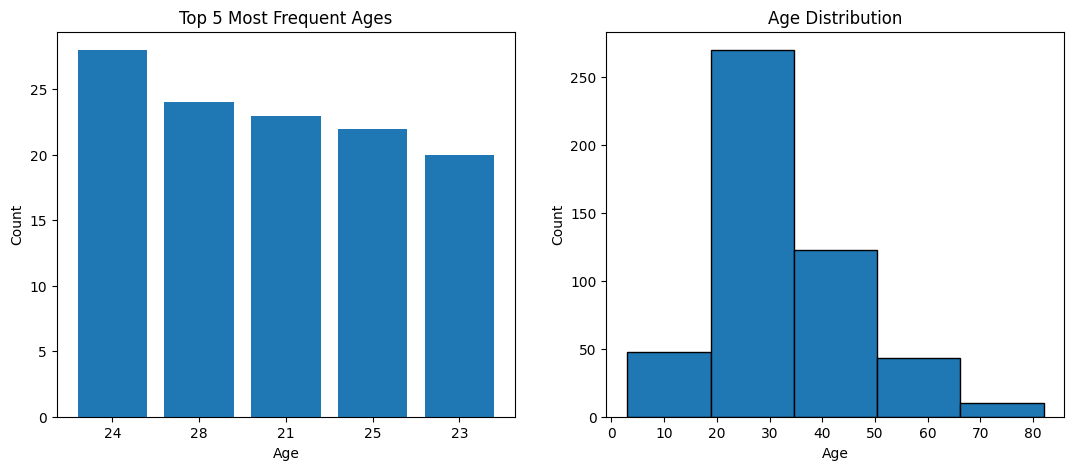

In [ ]:
df_age = df['Age'].value_counts(ascending=False).reset_index()
df_age.columns = ['Age', 'Count']
df_age['Age'] = df_age['Age'].astype(str)
df_age_head = df_age.head()

f,ax=plt.subplots(1, 2, figsize=(13,5))
ax[0].bar(df_age_head['Age'], df_age_head['Count'])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].set_title('Top 5 Most Frequent Ages')
ax[1].hist(df['Age'], bins=5, edgecolor='k')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')
ax[1].set_title('Age Distribution')
plt.show()

Patients aged 24 are the most common patients in the dataset.

**Creatinine**

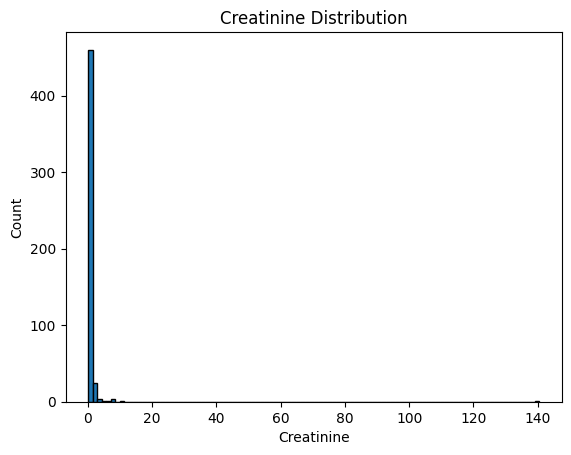

In [ ]:
plt.hist(df_input['Creatinine'], bins=100, edgecolor='k')
plt.xlabel('Creatinine')
plt.ylabel('Count')
plt.title('Creatinine Distribution')
plt.show()

**Semi-quantitative UACR**

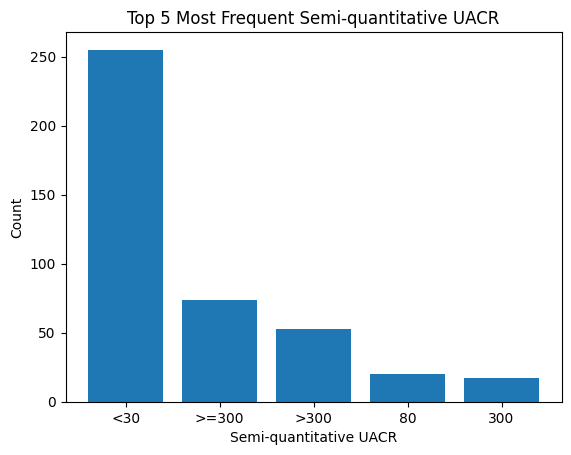

In [ ]:
df_sq = df_input['Semi-quantitative UACR'].value_counts(ascending=False).reset_index()
df_sq.columns = ['Semi-quantitative UACR', 'Count']
df_sq_head = df_sq.head()

plt.bar(df_sq_head['Semi-quantitative UACR'], df_sq_head['Count'])
plt.xlabel('Semi-quantitative UACR')
plt.ylabel('Count')
plt.title('Top 5 Most Frequent Semi-quantitative UACR')
plt.show()

In [ ]:
df_sq

,Semi-quantitative UACR,Count
0,<30,255
1,>=300,74
2,>300,53
3,80,20
4,300,17
5,<80,15
6,100,12
7,30,11
8,200,11
9,>=150,9


There are 13 classes of Semi-quantitative UACR and the most class in the dataset is <30.

### **Label Encoding**

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df_input['Semi-quantitative UACR'] = label_encoder.fit_transform(df_input['Semi-quantitative UACR'])

**Urinary Creatinine**

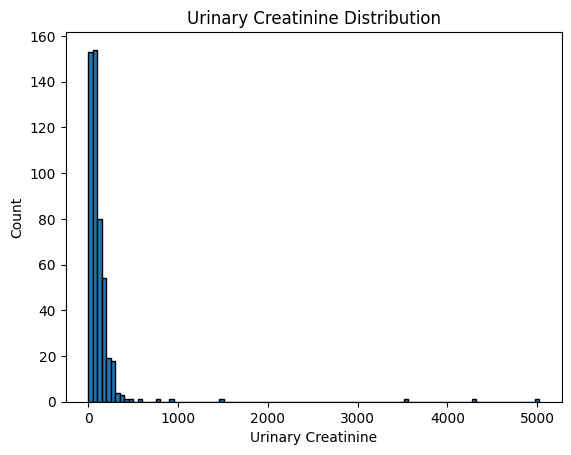

In [ ]:
plt.hist(df['Urinary Creatinine'], bins=100, edgecolor='k')
plt.xlabel('Urinary Creatinine')
plt.ylabel('Count')
plt.title('Urinary Creatinine Distribution')
plt.show()

**Quantitative UACR**

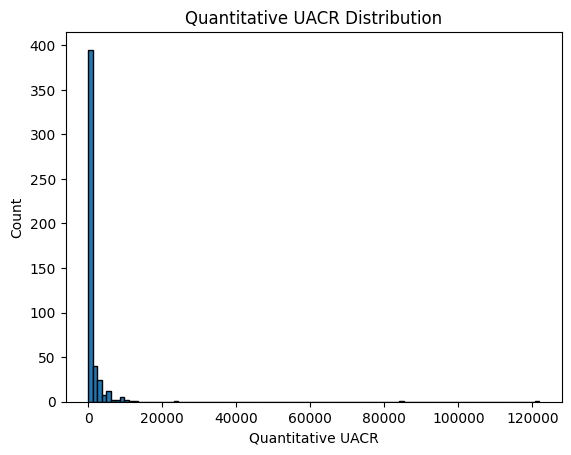

In [ ]:
plt.hist(df['Quantitative UACR'], bins=100, edgecolor='k')
plt.xlabel('Quantitative UACR')
plt.ylabel('Count')
plt.title('Quantitative UACR Distribution')
plt.show()

**Urinary Albumin**

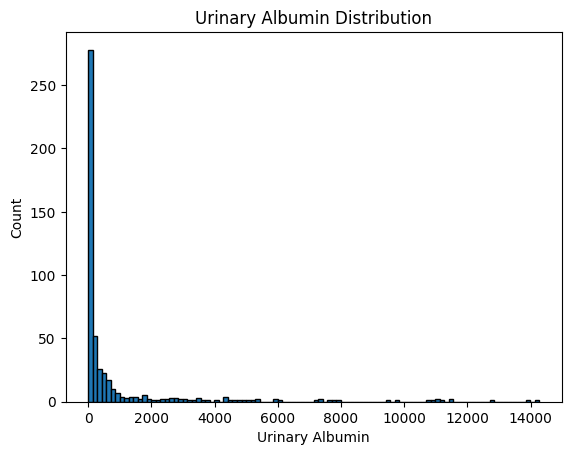

In [ ]:
plt.hist(df['Urinary Albumin'], bins=100, edgecolor='k')
plt.xlabel('Urinary Albumin')
plt.ylabel('Count')
plt.title('Urinary Albumin Distribution')
plt.show()

### **Nephropaty**

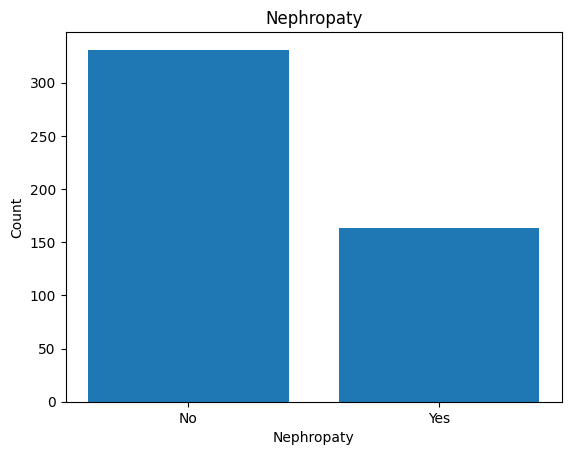

In [ ]:
df_neph = pd.DataFrame({'Urinary Albumin': df['Urinary Albumin']})
df_neph['Nephropaty'] = df_neph['Urinary Albumin'].apply(lambda x: 'Yes' if x > 300 else "No")
df_neph = df_neph['Nephropaty'].value_counts(ascending=False).reset_index()
df_neph.columns = ['Nephropaty', 'Count']

plt.bar(df_neph['Nephropaty'], df_neph['Count'])
plt.xlabel('Nephropaty')
plt.ylabel('Count')
plt.title('Nephropaty')
plt.show()

More patients who did not have nephropathy than those who did.

### **Correlation**

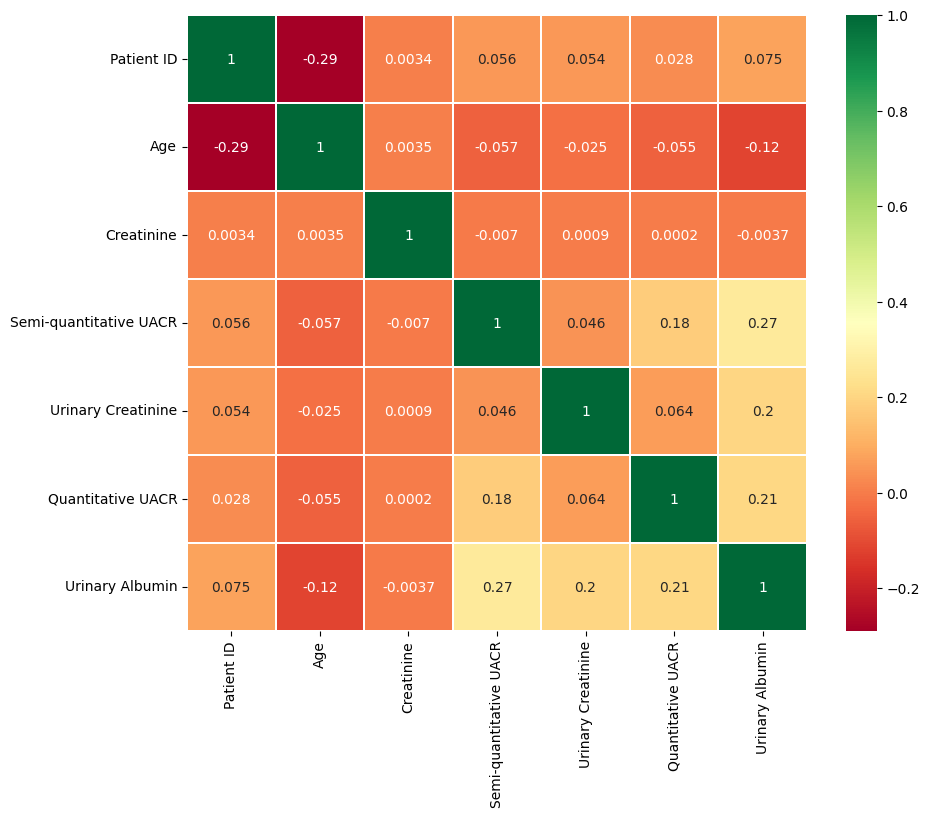

In [ ]:
sns.heatmap(df_input.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- The determinant of a patient being affected by nephropathy is when the Urinary Albumin or Quantitative UACR value is more than 300.
- Urinary Albumin and Semi-quantitative UACR are the most correlated features.
- The correlation between Urinary Creatinine or Quantitative UACR and Urinary Albumin is also high.

## **Modelling (Prediction)**

### **Split Dataset**

In [ ]:
X = df_input.drop(['Name', 'Urinary Albumin', 'Age', 'Creatinine', 'Patient ID'], axis=1)
y = df_input['Urinary Albumin']

Only uses 3 features for testing, which are Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
print("Train Data:", X_train.shape[0])
print("Test Data:", X_test.shape[0])

Train Data: 395
Test Data: 99


### **Modelling and Evaluation Function**

In [ ]:
def evaluation(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  return mae, mse, rmse

def rmse_cv(model):
  rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
  return rmse

In [ ]:
func = np.vectorize(lambda x: 'yes' if x > 300 else 'no')
test = func(y_test)

In [ ]:
models = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "Accuracy"])

### **Linear Regression**

In [ ]:
start = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "LinearRegression", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 1192.599053301927
MSE: 4535238.771085919
RMSE: 2129.6100044576046
RMSE Cross-Validation: 2066.9509911626214
Accuracy: 0.5353535353535354


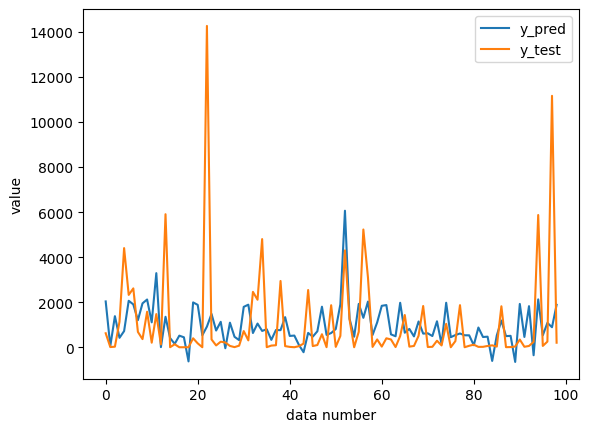

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Polynomial Regression**

In [ ]:
start = time.time()
poly = PolynomialFeatures()
X_train_2d = poly.fit_transform(X_train)
X_test_2d = poly.transform(X_test)
end = time.time()
duration = end - start

lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_2d, y_train)
y_pred = lin_reg2.predict(X_test_2d)

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(lin_reg2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "PolynomialRegression", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 859.5191618949756
MSE: 4365510.62400562
RMSE: 2089.380440227586
RMSE Cross-Validation: 2066.9509911626214
Accuracy: 0.797979797979798


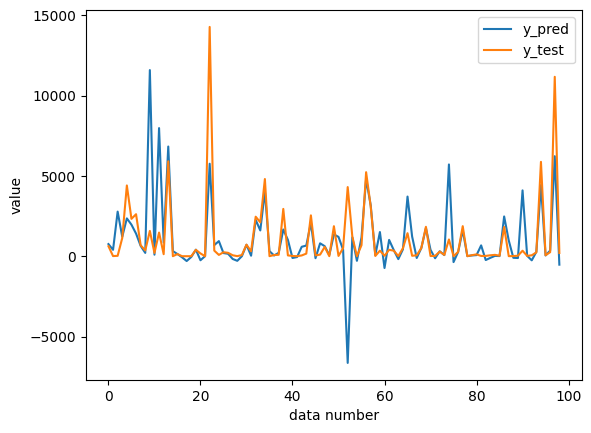

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Ridge**

In [ ]:
start = time.time()
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "Ridge", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 1192.5413669774114
MSE: 4535046.791194006
RMSE: 2129.564930025381
RMSE Cross-Validation: 2066.9522550630727
Accuracy: 0.5353535353535354


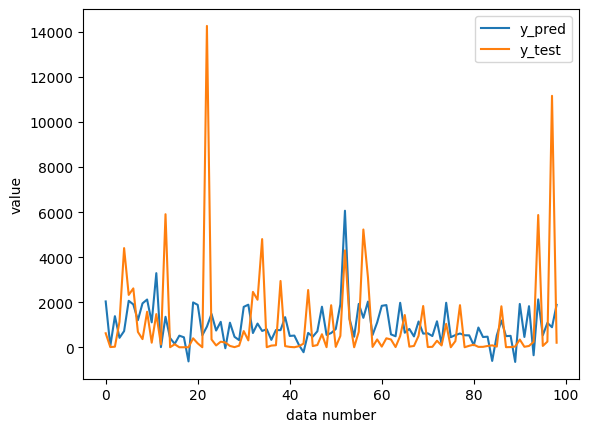

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Bayesian Ridge**

In [ ]:
start = time.time()
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train, y_train)
y_pred = bayes_ridge.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(bayes_ridge)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "BayessianRidge", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 1101.2673868721433
MSE: 4246540.724770255
RMSE: 2060.7136445344013
RMSE Cross-Validation: 2125.1972797930766
Accuracy: 0.41414141414141414


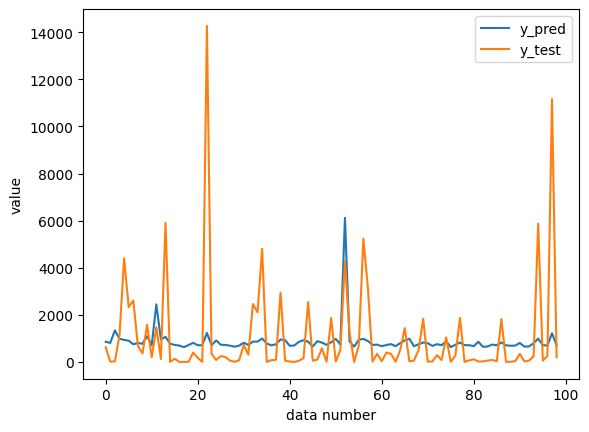

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Lasso**

In [ ]:
start = time.time()
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "Lasso", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 1192.4812282200387
MSE: 4534846.294911583
RMSE: 2129.5178550346986
RMSE Cross-Validation: 2066.960664028519
Accuracy: 0.5353535353535354


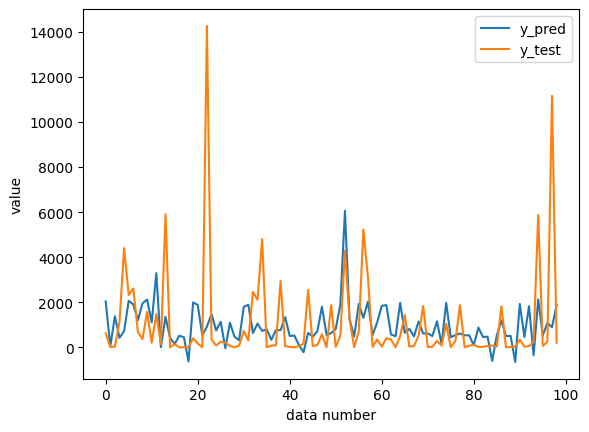

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Huber**

In [ ]:
start = time.time()
huber = HuberRegressor()
huber.fit(X_train, y_train)
y_pred = huber.predict(X_test)
end = time.time()
duration = end - start
dur1 = duration

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "Huber", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 772.3338938910773
MSE: 3996079.8563965647
RMSE: 1999.0197238638154
RMSE Cross-Validation: 3255.4848699775607
Accuracy: 0.898989898989899


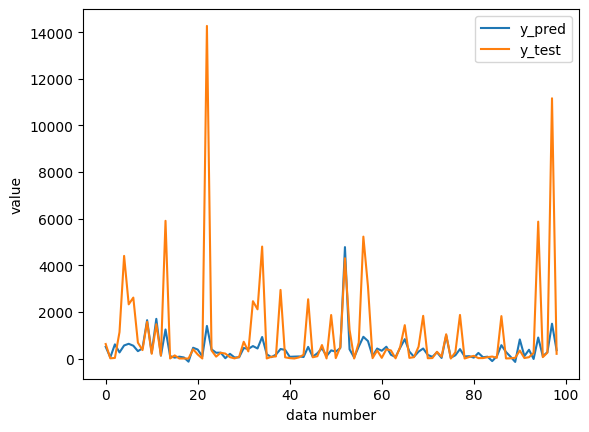

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Orthogonal Matching Pursuit**

In [ ]:
start = time.time()
omp = OrthogonalMatchingPursuit()
omp.fit(X_train, y_train)
y_pred = omp.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(omp)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "OrthogonalMatchingPursuit", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 1125.592036797442
MSE: 4316179.166824743
RMSE: 2077.5416161474946
RMSE Cross-Validation: 2170.094170759041
Accuracy: 0.41414141414141414


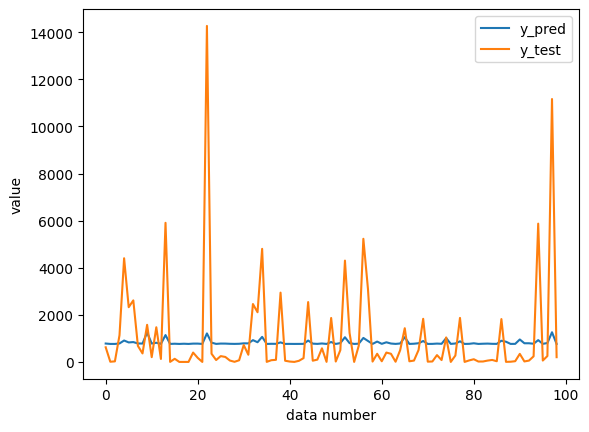

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Lars**

In [ ]:
start = time.time()
lars = Lars()
lars.fit(X_train, y_train)
y_pred = lars.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(lars)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "Lars", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 1192.5990533019262
MSE: 4535238.771085917
RMSE: 2129.610004457604
RMSE Cross-Validation: 2066.9509911626214
Accuracy: 0.5353535353535354


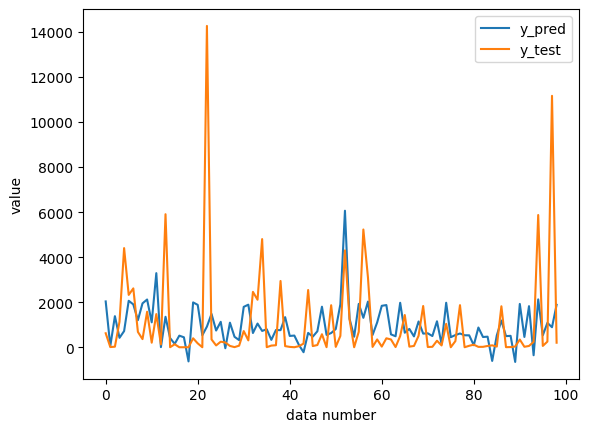

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Tweedie**

In [ ]:
start = time.time()
tweedie = TweedieRegressor()
tweedie.fit(X_train, y_train)
y_pred = tweedie.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(tweedie)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "TweedieRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 1172.8159076635632
MSE: 4471046.382231261
RMSE: 2114.48489761248
RMSE Cross-Validation: 2067.832444135529
Accuracy: 0.5353535353535354


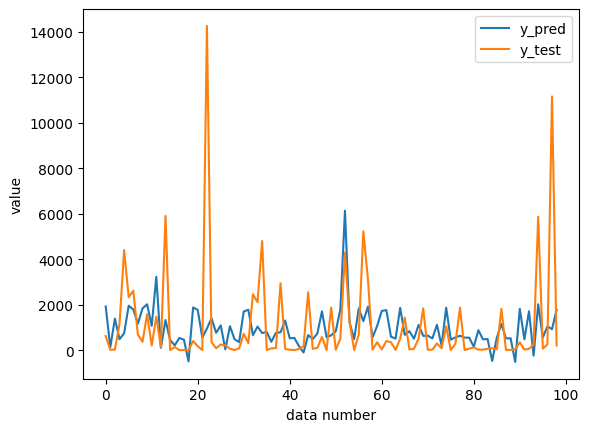

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **RANSAC**

In [ ]:
start = time.time()
ransac = RANSACRegressor(random_state=0)
ransac.fit(X_train, y_train)
y_pred = ransac.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(ransac)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "RANSACRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 538.889946636542
MSE: 1649393.375641386
RMSE: 1284.2871079479798
RMSE Cross-Validation: 4529.925083694962
Accuracy: 0.9090909090909091


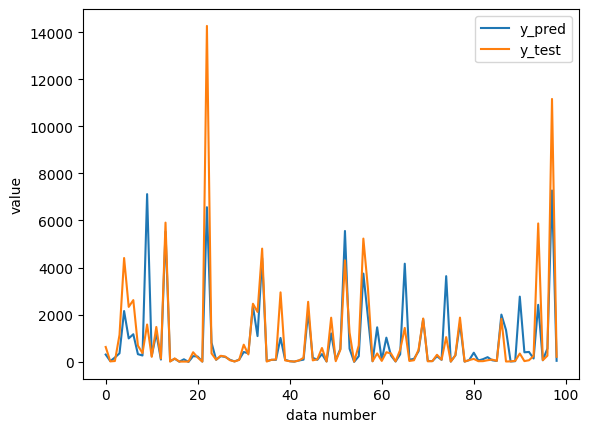

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **SVR**

In [ ]:
# start = time.time()
# svr_lin = SVR(kernel='linear')
# svr_lin.fit(X_train, y_train)
# y_pred = svr_lin.predict(X_test)
# end = time.time()
# duration = end - start

# mae, mse, rmse = evaluation(y_test, y_pred)
# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# rmse_cross_val = rmse_cv(svr_lin)
# print("RMSE Cross-Validation:", rmse_cross_val)
# pred = func(y_pred)
# acc = accuracy_score(test, pred)
# print("Accuracy:", acc)

# new_row = {"Model": "SVR (Linear)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
# models = models.append(new_row, ignore_index=True)

In [ ]:
# index = np.arange(len(y_pred))
# plt.plot(index, y_pred, label='y_pred')
# plt.plot(index, y_test, label='y_test')
# plt.xlabel('data number')
# plt.ylabel('value')
# plt.legend()
# plt.show()

In [ ]:
start = time.time()
svr_poly = SVR(kernel='poly')
svr_poly.fit(X_train, y_train)
y_pred = svr_poly.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(svr_poly)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "SVR (Polynomial)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 985.2962281212788
MSE: 5524218.851328467
RMSE: 2350.3656845964347
RMSE Cross-Validation: 2261.3921871295033
Accuracy: 0.5858585858585859


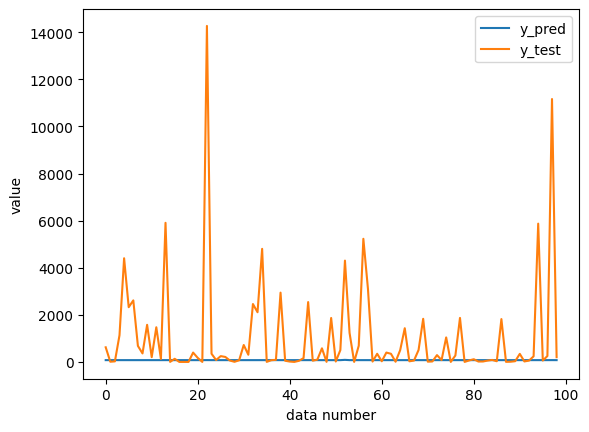

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
start = time.time()
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(svr_rbf)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "SVR (RBF)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 978.3171882312904
MSE: 5468568.847780277
RMSE: 2338.4971344391843
RMSE Cross-Validation: 2249.5339598026458
Accuracy: 0.5858585858585859


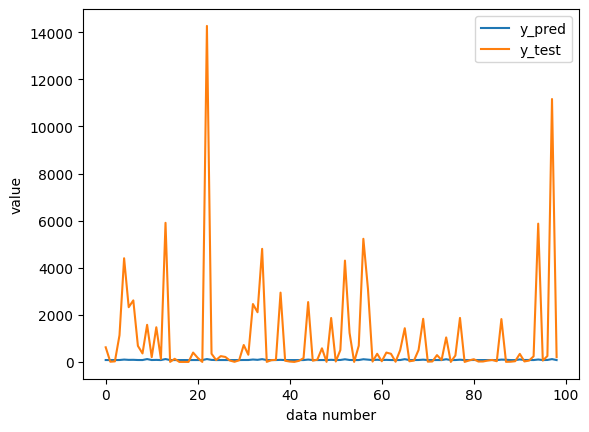

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Decision Tree**

In [ ]:
start = time.time()
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(dec_tree)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "DecisionTreeRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 280.91383838383837
MSE: 561838.181110101
RMSE: 749.558657551296
RMSE Cross-Validation: 1272.4723289684866
Accuracy: 0.9292929292929293


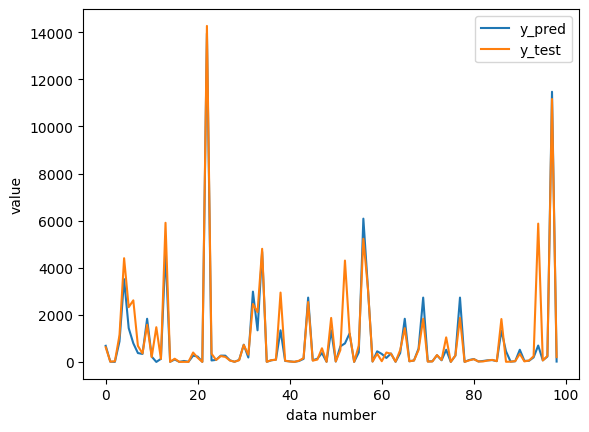

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Random Forest**

In [ ]:
start = time.time()
random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
end = time.time()
duration = end - start
dur2 = duration

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "RandomForestRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 281.3347515151516
MSE: 502242.5899188266
RMSE: 708.6907576078769
RMSE Cross-Validation: 976.7365178614857
Accuracy: 0.9696969696969697


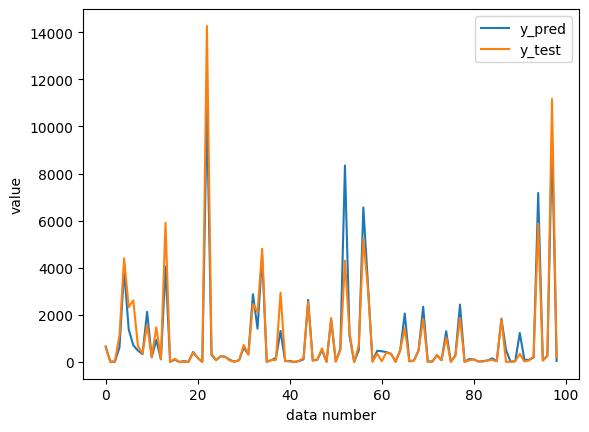

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Elastic Net**

In [ ]:
start = time.time()
elastic = ElasticNet()
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(elastic)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "ElasticNet", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 1181.8291032454845
MSE: 4500256.905232235
RMSE: 2121.380895839367
RMSE Cross-Validation: 2067.3116216513736
Accuracy: 0.5353535353535354


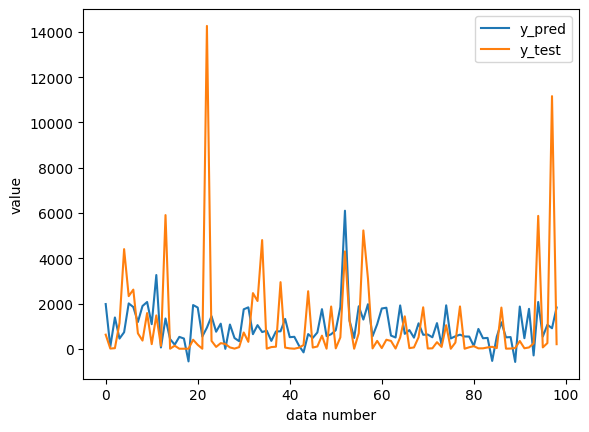

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **KNN**

In [ ]:
start = time.time()
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(knn)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "KNNRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 610.5470909090909
MSE: 2435932.007835596
RMSE: 1560.7472594355552
RMSE Cross-Validation: 1350.1623280019267
Accuracy: 0.9696969696969697


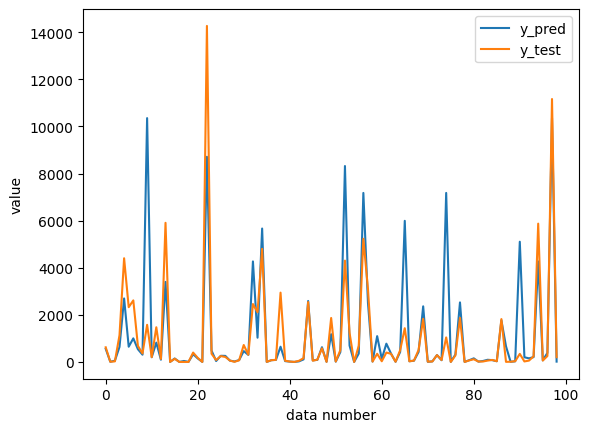

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Gradient Boosting**

In [ ]:
start = time.time()
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(gbr)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "GradientBoostingRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 323.2294258916456
MSE: 470162.772874862
RMSE: 685.6841640834809
RMSE Cross-Validation: 987.5013521237088
Accuracy: 0.9191919191919192


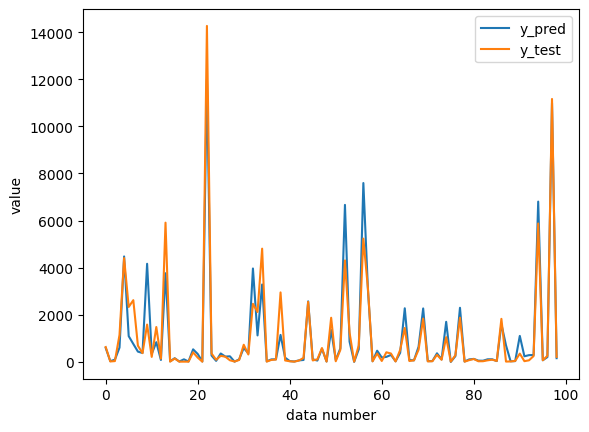

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **LGBM**

In [ ]:
start = time.time()
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(lgbm)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "LGBMRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 395, number of used features: 3
[LightGBM] [Info] Start training from score 834.716254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

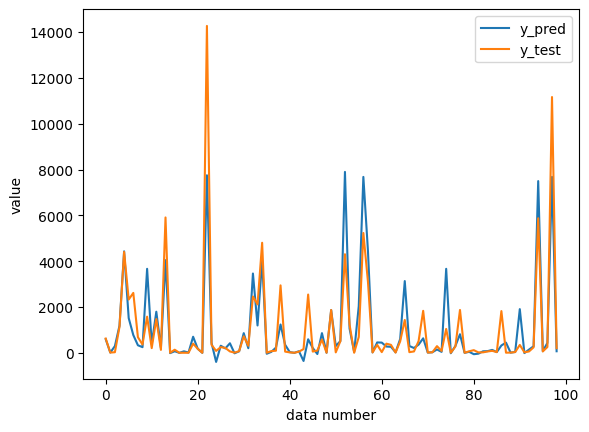

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **XGBoost**

In [ ]:
start = time.time()
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "XGBRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 328.2047769389369
MSE: 630953.6329287819
RMSE: 794.3258984376513
RMSE Cross-Validation: 1118.5371788991806
Accuracy: 0.9595959595959596


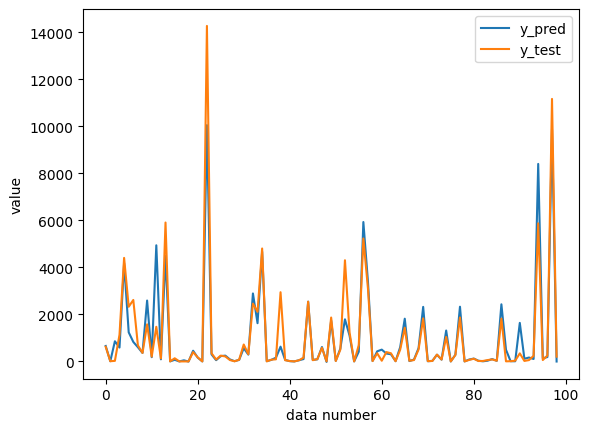

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Adaboost**

In [ ]:
start = time.time()
adaboost = AdaBoostRegressor(random_state=0)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(adaboost)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "AdaBoostRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 1010.3329901167236
MSE: 2096192.2992512323
RMSE: 1447.823296970743
RMSE Cross-Validation: 1318.1692641203535
Accuracy: 0.7373737373737373


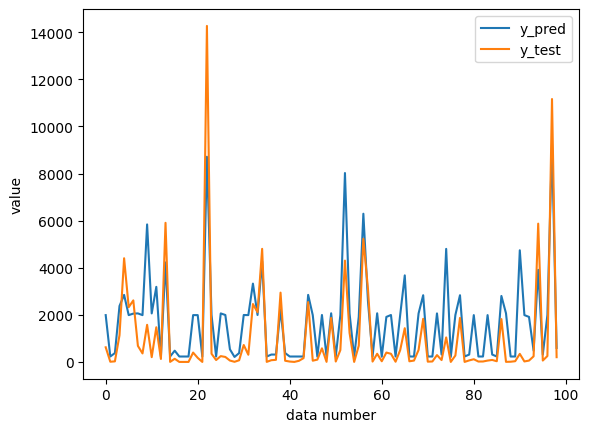

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **CatBoost**

In [ ]:
start = time.time()
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)
end = time.time()
duration = end - start
dur3 = duration

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "CatBoostRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

Streaming output truncated to the last 5000 lines.
6:	learn: 1872.4347544	total: 6.98ms	remaining: 990ms
7:	learn: 1837.9912149	total: 7.93ms	remaining: 984ms
8:	learn: 1807.5644587	total: 8.91ms	remaining: 981ms
9:	learn: 1772.6719562	total: 10ms	remaining: 992ms
10:	learn: 1742.7982758	total: 11ms	remaining: 988ms
11:	learn: 1707.7215414	total: 11.9ms	remaining: 984ms
12:	learn: 1679.9642165	total: 12.9ms	remaining: 976ms
13:	learn: 1650.5360237	total: 13.7ms	remaining: 967ms
14:	learn: 1624.6407360	total: 14.6ms	remaining: 960ms
15:	learn: 1598.9079766	total: 15.5ms	remaining: 955ms
16:	learn: 1570.8664749	total: 16.5ms	remaining: 952ms
17:	learn: 1543.4553345	total: 17.5ms	remaining: 953ms
18:	learn: 1518.5793371	total: 18.4ms	remaining: 951ms
19:	learn: 1494.8147237	total: 19.4ms	remaining: 949ms
20:	learn: 1469.2376071	total: 20.2ms	remaining: 943ms
21:	learn: 1445.7290542	total: 21.1ms	remaining: 939ms
22:	learn: 1422.4848637	total: 22ms	remaining: 934ms
23:	learn: 1396.1862109	

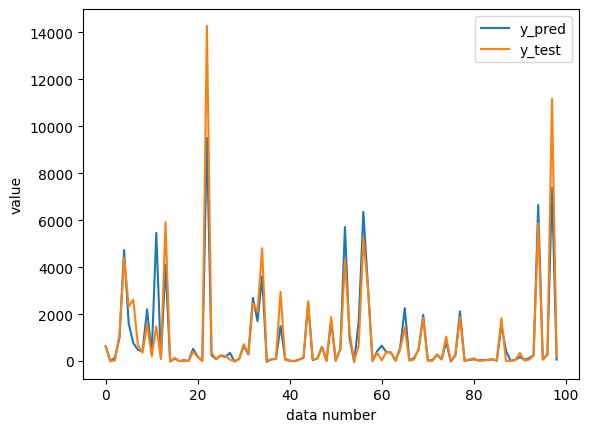

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Stacking Regression**
- Regressors = CatBoost and Random Forest
- Meta Regressor = Huber

In [ ]:
start = time.time()
stacking = StackingRegressor(regressors=[catboost, random_forest], meta_regressor=huber)
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
end = time.time()
duration = end - start
duration = duration + dur1 + dur2 + dur3

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(stacking)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "StackingRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

Streaming output truncated to the last 5000 lines.
6:	learn: 1872.4347544	total: 16.5ms	remaining: 2.34s
7:	learn: 1837.9912149	total: 18.4ms	remaining: 2.29s
8:	learn: 1807.5644587	total: 21.1ms	remaining: 2.32s
9:	learn: 1772.6719562	total: 22.4ms	remaining: 2.21s
10:	learn: 1742.7982758	total: 24.3ms	remaining: 2.19s
11:	learn: 1707.7215414	total: 26.2ms	remaining: 2.15s
12:	learn: 1679.9642165	total: 27.9ms	remaining: 2.12s
13:	learn: 1650.5360237	total: 29.9ms	remaining: 2.11s
14:	learn: 1624.6407360	total: 31.8ms	remaining: 2.08s
15:	learn: 1598.9079766	total: 33.7ms	remaining: 2.07s
16:	learn: 1570.8664749	total: 35.6ms	remaining: 2.06s
17:	learn: 1543.4553345	total: 37.4ms	remaining: 2.04s
18:	learn: 1518.5793371	total: 39.4ms	remaining: 2.03s
19:	learn: 1494.8147237	total: 41.2ms	remaining: 2.02s
20:	learn: 1469.2376071	total: 43.2ms	remaining: 2.01s
21:	learn: 1445.7290542	total: 45.2ms	remaining: 2.01s
22:	learn: 1422.4848637	total: 47.1ms	remaining: 2s
23:	learn: 1396.18621

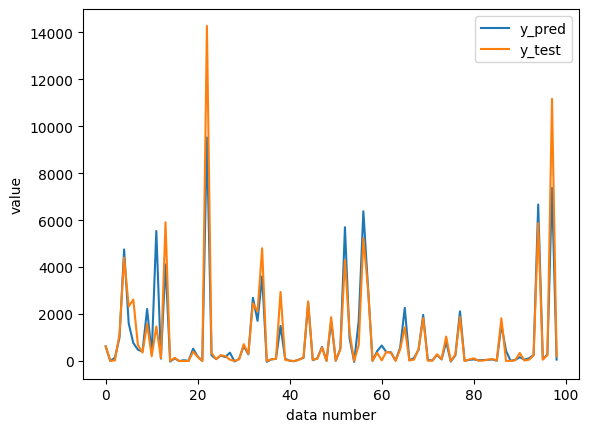

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **ANN**

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

start = time.time()
ann = Sequential()
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=3))
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
ann.add(Dropout(0.25))
ann.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
ann.add(Dropout(0.5))
ann.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

opt = Adam(learning_rate=0.01)
ann.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_absolute_error'])

history = ann.fit(X_train, y_train, batch_size=16, epochs=150, callbacks=[early_stopping], validation_split=0.2)
y_pred = ann.predict(X_test)
end = time.time()
duration = end - start

Epoch 1/150
20/20 [==============================] - 2s 27ms/step - loss: 5009614.5000 - mean_absolute_error: 774.7213 - val_loss: 34943224.0000 - val_mean_absolute_error: 1266.4712
Epoch 2/150
20/20 [==============================] - 0s 8ms/step - loss: 7690096.5000 - mean_absolute_error: 647.6164 - val_loss: 67496520.0000 - val_mean_absolute_error: 1532.5758
Epoch 3/150
20/20 [==============================] - 0s 7ms/step - loss: 21060680.0000 - mean_absolute_error: 859.9535 - val_loss: 15433399.0000 - val_mean_absolute_error: 1031.7061
Epoch 4/150
20/20 [==============================] - 0s 7ms/step - loss: 4593914.5000 - mean_absolute_error: 753.7343 - val_loss: 4185066.5000 - val_mean_absolute_error: 831.3434
Epoch 5/150
20/20 [==============================] - 0s 6ms/step - loss: 5324254.0000 - mean_absolute_error: 816.8965 - val_loss: 4193150.0000 - val_mean_absolute_error: 830.0571
Epoch 6/150
20/20 [==============================] - 0s 8ms/step - loss: 5281377.0000 - mean_abso

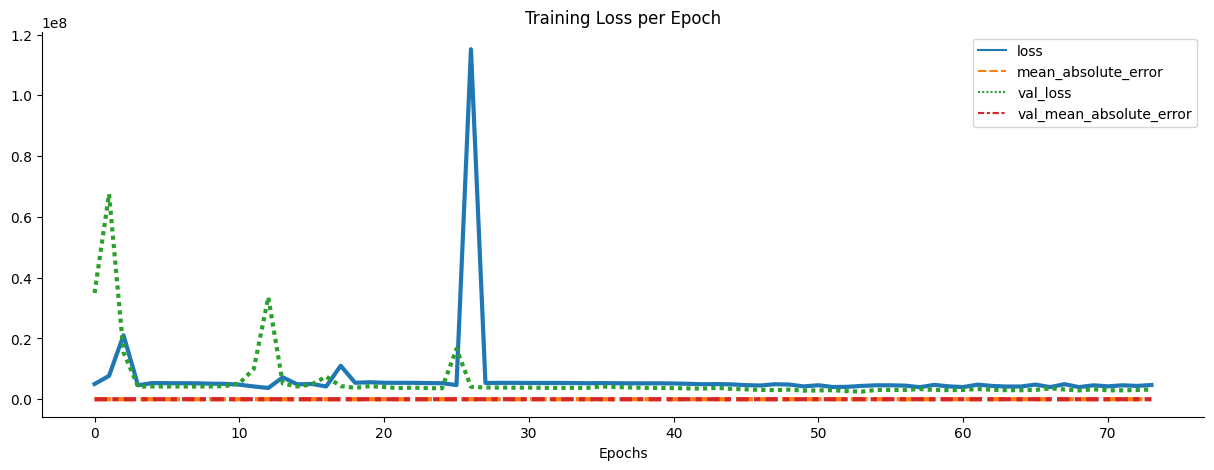

In [ ]:
losses = pd.DataFrame(history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.title('Training Loss per Epoch')
sns.despine()

In [ ]:
mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("RMSE Cross-Validation:", rmse)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "ANN", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 820.894714093449
MSE: 3750846.569792231
RMSE: 1936.7102441491425
RMSE Cross-Validation: 1936.7102441491425
Accuracy: 0.7474747474747475


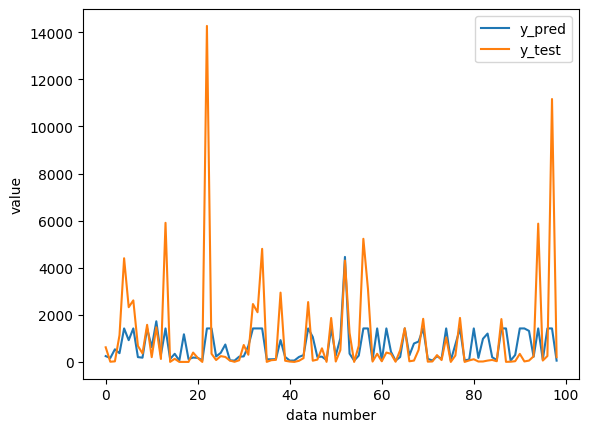

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **ELM**

In [ ]:
start = time.time()
input_dim = X_train.shape[1]
hidden_dim = 50
bias = np.random.randn(hidden_dim)
input_weights = np.random.randn(input_dim, hidden_dim)

hidden_output = np.dot(X_train, input_weights) + bias
hidden_output = np.maximum(hidden_output, 0)
output_weights = np.dot(np.linalg.pinv(hidden_output), y_train)

hidden_output_test = np.dot(X_test, input_weights) + bias
hidden_output_test = np.maximum(hidden_output_test, 0)
y_pred = np.dot(hidden_output_test, output_weights)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("RMSE Cross-Validation:", rmse)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "ELM", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 840.0210254066759
MSE: 4224039.060567647
RMSE: 2055.246715255287
RMSE Cross-Validation: 2055.246715255287
Accuracy: 0.7878787878787878


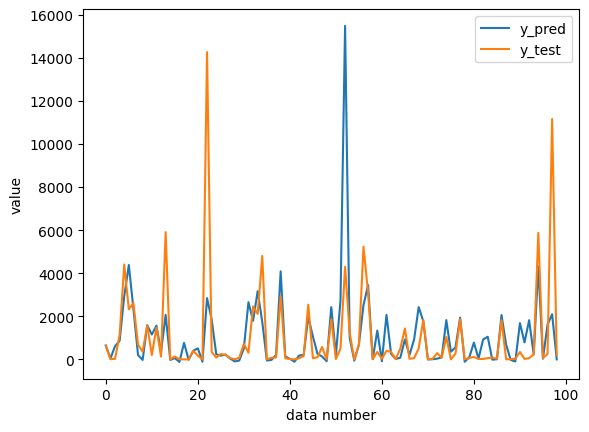

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
start = time.time()
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elm', SVR(kernel='linear', C=1.0, epsilon=0.1))
])

param_grid = {
    'elm__C': [0.1, 1.0, 10.0],
    'elm__epsilon': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("RMSE Cross-Validation:", rmse)
pred = func(y_pred)
acc = accuracy_score(test, pred)
print("Accuracy:", acc)

new_row = {"Model": "ELM (SVR)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse, "Accuracy": acc}
models = models.append(new_row, ignore_index=True)

MAE: 884.8103674194812
MSE: 5008580.206606741
RMSE: 2237.985747632621
RMSE Cross-Validation: 2237.985747632621
Accuracy: 0.7373737373737373


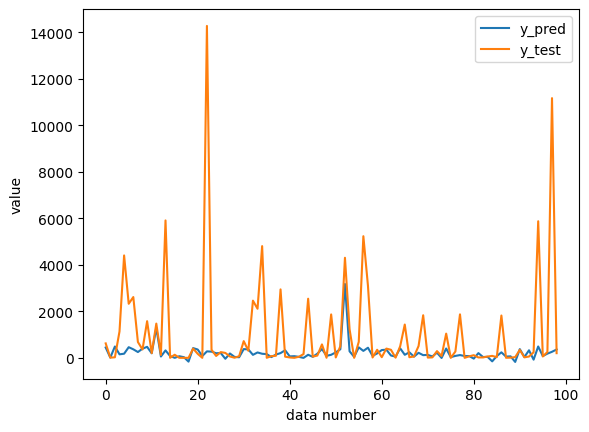

In [ ]:
index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test, label='y_test')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

## **Evaluation**

### **Result**

In [ ]:
mae = models.sort_values(by="MAE").reset_index(drop=True)
mse = models.sort_values(by="MSE").reset_index(drop=True)
rmse = models.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = models.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = models.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

mods = np.array(models['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    scores.append(score)

score(models)
models['Score'] = pd.DataFrame(scores)
models['Rank'] = models['Score'].rank().astype(int)
models.sort_values(by="Rank").reset_index(drop=True)

,Model,Duration,MAE,MSE,RMSE,RMSE (Cross-Validation),Accuracy,Score,Rank
0,RandomForestRegressor,0.380022,281.334752,5.022426e+05,708.690758,976.736518,0.969697,4,1
1,DecisionTreeRegressor,0.051387,280.913838,5.618382e+05,749.558658,1272.472329,0.929293,13,2
2,GradientBoostingRegressor,0.150404,323.229426,4.701628e+05,685.684164,987.501352,0.919192,13,2
3,CatBoostRegressor,1.358134,319.883989,7.190922e+05,847.993021,981.968853,0.929293,16,4
4,XGBRegressor,0.999943,328.204777,6.309536e+05,794.325898,1118.537179,0.959596,18,5
5,StackingRegressor,4.037470,321.482182,7.234304e+05,850.547128,987.151819,0.929293,19,6
6,LGBMRegressor,0.143248,517.340582,1.211497e+06,1100.680284,1034.036481,0.888889,31,7
7,KNNRegressor,0.016717,610.547091,2.435932e+06,1560.747259,1350.162328,0.969697,34,8
8,ANN,12.430705,820.894714,3.750847e+06,1936.710244,1936.710244,0.747475,51,9
9,RANSACRegressor,0.066891,538.889947,1.649393e+06,1284.287108,4529.925084,0.909091,52,10


Random Forest is the best model compared to other models (without tuning).

### **Models Evaluation Sort by RMSE (Cross-Validation)**

In [ ]:
models.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)

,Model,Duration,MAE,MSE,RMSE,RMSE (Cross-Validation),Accuracy,Score,Rank
0,RandomForestRegressor,0.380022,281.334752,5.022426e+05,708.690758,976.736518,0.969697,4,1
1,CatBoostRegressor,1.358134,319.883989,7.190922e+05,847.993021,981.968853,0.929293,16,4
2,StackingRegressor,4.037470,321.482182,7.234304e+05,850.547128,987.151819,0.929293,19,6
3,GradientBoostingRegressor,0.150404,323.229426,4.701628e+05,685.684164,987.501352,0.919192,13,2
4,LGBMRegressor,0.143248,517.340582,1.211497e+06,1100.680284,1034.036481,0.888889,31,7
5,XGBRegressor,0.999943,328.204777,6.309536e+05,794.325898,1118.537179,0.959596,18,5
6,DecisionTreeRegressor,0.051387,280.913838,5.618382e+05,749.558658,1272.472329,0.929293,13,2
7,AdaBoostRegressor,0.104868,1010.332990,2.096192e+06,1447.823297,1318.169264,0.737374,52,10
8,KNNRegressor,0.016717,610.547091,2.435932e+06,1560.747259,1350.162328,0.969697,34,8
9,ANN,12.430705,820.894714,3.750847e+06,1936.710244,1936.710244,0.747475,51,9


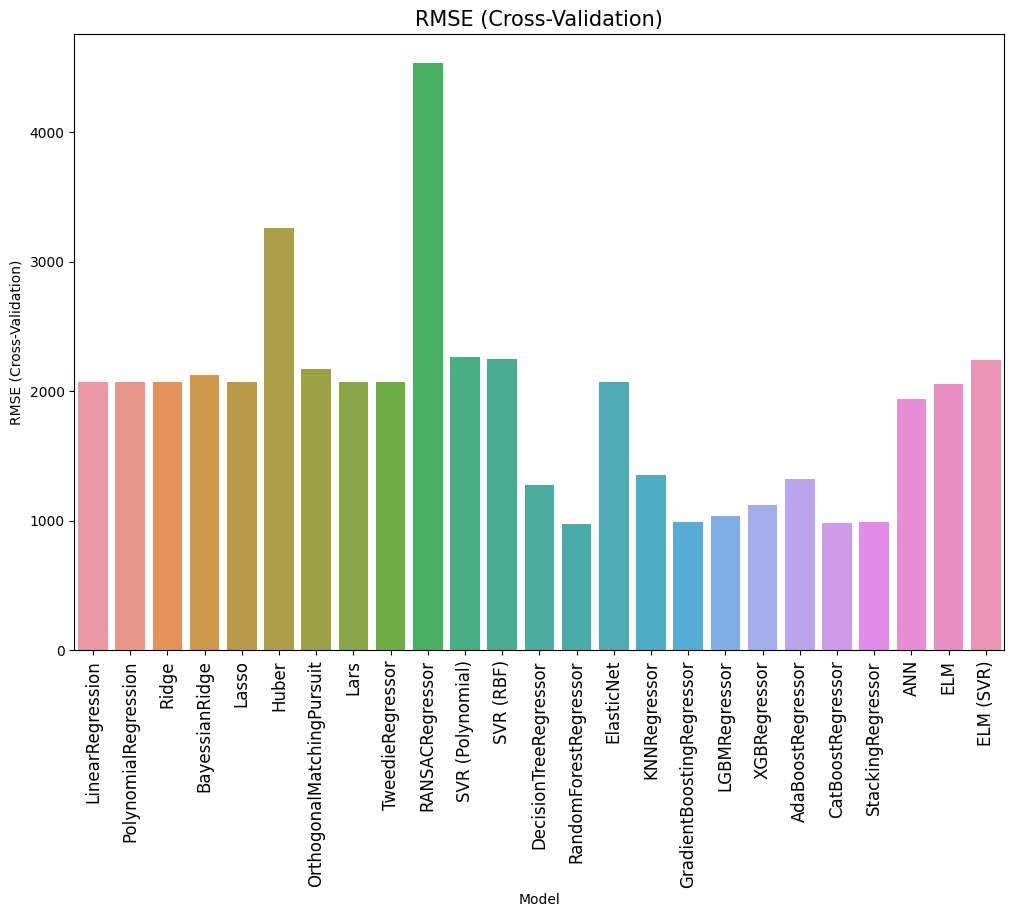

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("RMSE (Cross-Validation)", size=15)
plt.xticks(rotation=90, size=12)
plt.show()

Random Forest has the lowest RMSE (Cross-Validation) compared to other models.

### **Models Evaluation Sort by Accuracy**

In [ ]:
models.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

,Model,Duration,MAE,MSE,RMSE,RMSE (Cross-Validation),Accuracy,Score,Rank
0,KNNRegressor,0.016717,610.547091,2.435932e+06,1560.747259,1350.162328,0.969697,34,8
1,RandomForestRegressor,0.380022,281.334752,5.022426e+05,708.690758,976.736518,0.969697,4,1
2,XGBRegressor,0.999943,328.204777,6.309536e+05,794.325898,1118.537179,0.959596,18,5
3,DecisionTreeRegressor,0.051387,280.913838,5.618382e+05,749.558658,1272.472329,0.929293,13,2
4,StackingRegressor,4.037470,321.482182,7.234304e+05,850.547128,987.151819,0.929293,19,6
5,CatBoostRegressor,1.358134,319.883989,7.190922e+05,847.993021,981.968853,0.929293,16,4
6,GradientBoostingRegressor,0.150404,323.229426,4.701628e+05,685.684164,987.501352,0.919192,13,2
7,RANSACRegressor,0.066891,538.889947,1.649393e+06,1284.287108,4529.925084,0.909091,52,10
8,Huber,0.106474,772.333894,3.996080e+06,1999.019724,3255.484870,0.898990,62,13
9,LGBMRegressor,0.143248,517.340582,1.211497e+06,1100.680284,1034.036481,0.888889,31,7


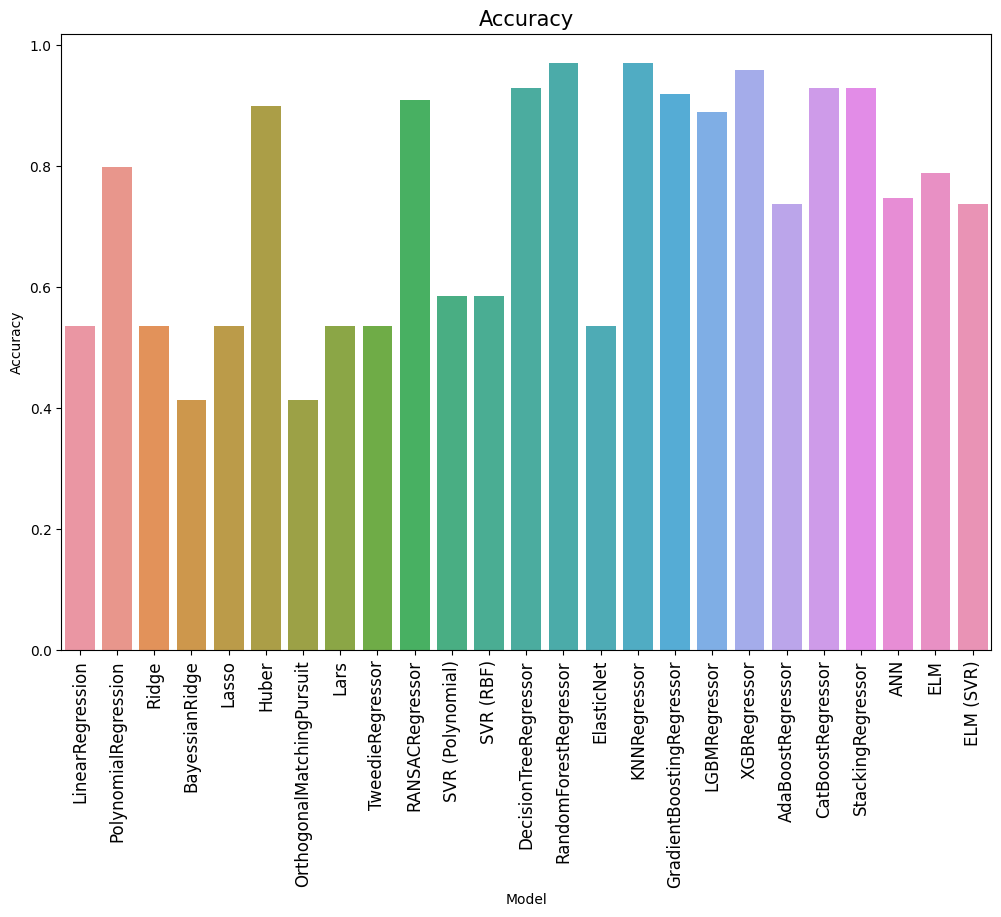

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["Accuracy"])
plt.title("Accuracy", size=15)
plt.xticks(rotation=90, size=12)
plt.show()

Random Forest and KNN has the highest accuracy compared to other models.

### **Feature Importance in Each Models**

Text(0.5, 1.0, 'Feature Importance in CatBoostRegressor')

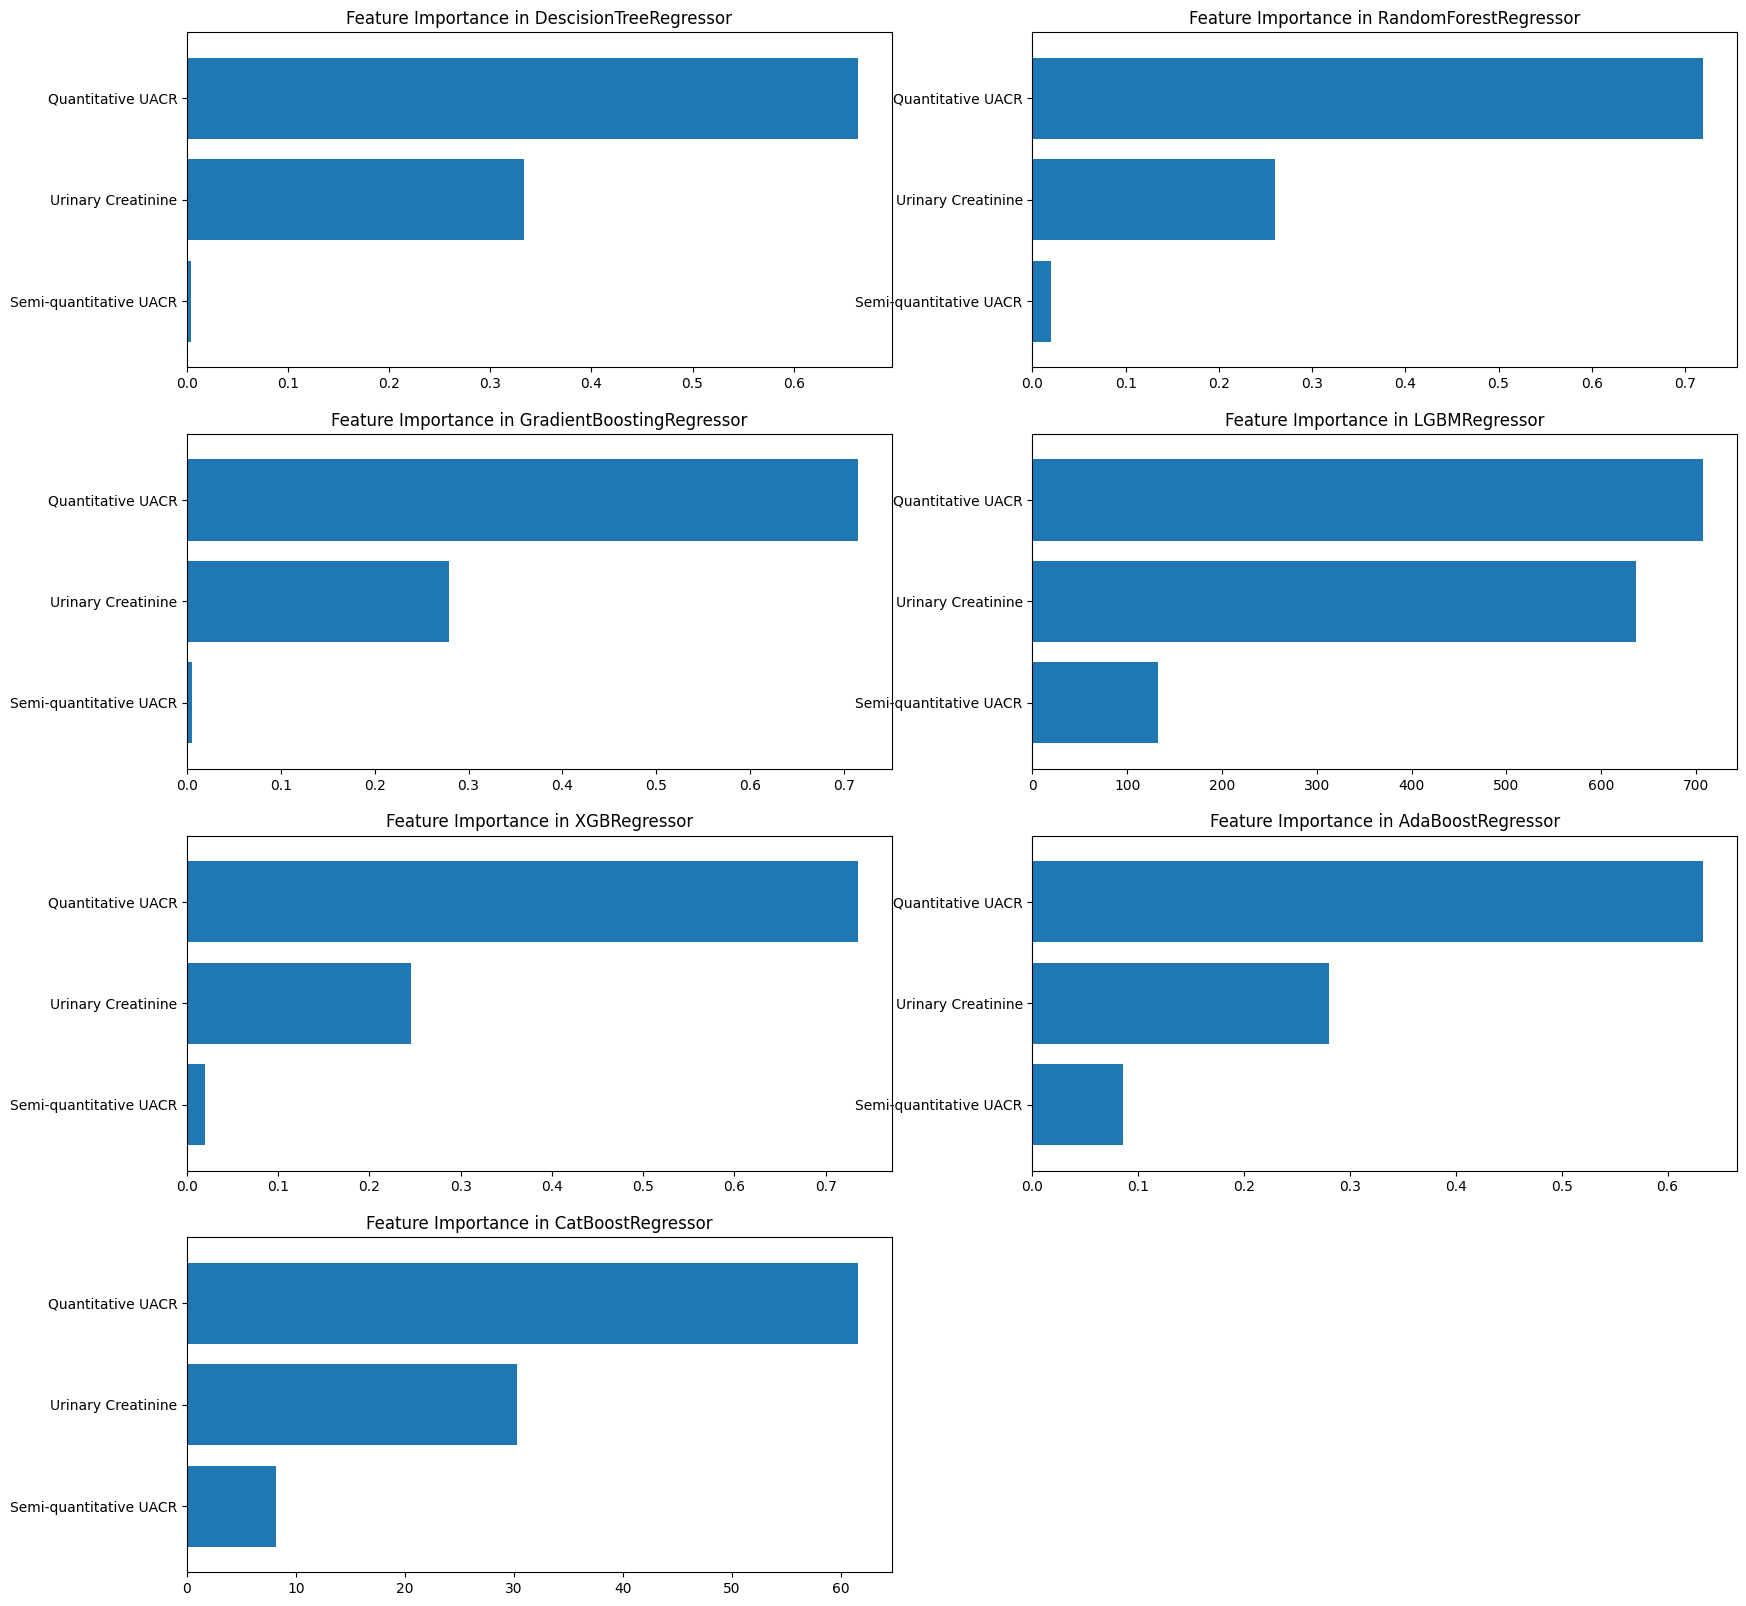

In [ ]:
f,ax=plt.subplots(4, 2, figsize=(20,20))
ax[3, 1].axis('off')
pd.Series(dec_tree.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in DescisionTreeRegressor')
pd.Series(random_forest.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1])
ax[0,1].set_title('Feature Importance in RandomForestRegressor')
pd.Series(gbr.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0])
ax[1,0].set_title('Feature Importance in GradientBoostingRegressor')
pd.Series(lgbm.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1])
ax[1,1].set_title('Feature Importance in LGBMRegressor')
pd.Series(xgb.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[2,0])
ax[2,0].set_title('Feature Importance in XGBRegressor')
pd.Series(adaboost.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[2,1])
ax[2,1].set_title('Feature Importance in AdaBoostRegressor')
pd.Series(catboost.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[3,0])
ax[3,0].set_title('Feature Importance in CatBoostRegressor')

- All models have the same feature importance order, which are Quantitative UACR, Urinary Creatinine, and Semi-quantitative UACR.
- Models other than those already mentioned don't have feature importance method.